In [ ]:
import os
import cv2
import pandas as pd
import tensorflow as tf
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

In [2]:
file = os.listdir("C:\\Users\\mudas\\Desktop\\Images\\Healthy")
Healthy = []
for i in file :
    Healthy.append(os.path.join("C:\\Users\\mudas\\Desktop\\Images\\Healthy",i))
df_healthy = pd.DataFrame(Healthy)
df_healthy.head()

,0
0,C:\Users\mudas\Desktop\Images\Healthy\3.jpg
1,C:\Users\mudas\Desktop\Images\Healthy\5.jpg
2,C:\Users\mudas\Desktop\Images\Healthy\7.jpg
3,C:\Users\mudas\Desktop\Images\Healthy\900.jpg
4,C:\Users\mudas\Desktop\Images\Healthy\download...


In [3]:
file = os.listdir("C:\\Users\\mudas\\Desktop\\Images\\underweight")
underweight = []
for i in file :
    underweight.append(os.path.join("C:\\Users\\mudas\\Desktop\\Images\\underweight",i))
df_underweight = pd.DataFrame(underweight)
df_underweight.head()

,0
0,C:\Users\mudas\Desktop\Images\underweight\5.jpg
1,C:\Users\mudas\Desktop\Images\underweight\556.jpg
2,C:\Users\mudas\Desktop\Images\underweight\boys...
3,C:\Users\mudas\Desktop\Images\underweight\down...
4,C:\Users\mudas\Desktop\Images\underweight\down...


In [4]:
file = os.listdir("C:\\Users\\mudas\\Desktop\\Images\\overweight")
overweight = []
for i in file :
    overweight.append(os.path.join("C:\\Users\\mudas\\Desktop\\Images\\overweight",i))
df_overweight = pd.DataFrame(overweight)
df_overweight.head()

,0
0,C:\Users\mudas\Desktop\Images\overweight\downl...
1,C:\Users\mudas\Desktop\Images\overweight\downl...
2,C:\Users\mudas\Desktop\Images\overweight\downl...
3,C:\Users\mudas\Desktop\Images\overweight\downl...
4,C:\Users\mudas\Desktop\Images\overweight\downl...


In [5]:
df_healthy['label'] = "H"
df_healthy = df_healthy.rename(columns={0:'file'})
df_healthy

,file,label
0,C:\Users\mudas\Desktop\Images\Healthy\3.jpg,H
1,C:\Users\mudas\Desktop\Images\Healthy\5.jpg,H
2,C:\Users\mudas\Desktop\Images\Healthy\7.jpg,H
3,C:\Users\mudas\Desktop\Images\Healthy\900.jpg,H
4,C:\Users\mudas\Desktop\Images\Healthy\download...,H
...,...,...
997,C:\Users\mudas\Desktop\Images\Healthy\ownload ...,H
998,C:\Users\mudas\Desktop\Images\Healthy\Project_...,H
999,C:\Users\mudas\Desktop\Images\Healthy\Project_...,H
1000,C:\Users\mudas\Desktop\Images\Healthy\q.jpg,H


In [6]:
df_underweight['label'] = "U"
df_underweight = df_underweight.rename(columns={0:'file'})
df_underweight

,file,label
0,C:\Users\mudas\Desktop\Images\underweight\5.jpg,U
1,C:\Users\mudas\Desktop\Images\underweight\556.jpg,U
2,C:\Users\mudas\Desktop\Images\underweight\boys...,U
3,C:\Users\mudas\Desktop\Images\underweight\down...,U
4,C:\Users\mudas\Desktop\Images\underweight\down...,U
...,...,...
995,C:\Users\mudas\Desktop\Images\underweight\unde...,U
996,C:\Users\mudas\Desktop\Images\underweight\unde...,U
997,C:\Users\mudas\Desktop\Images\underweight\unde...,U
998,C:\Users\mudas\Desktop\Images\underweight\unde...,U


In [7]:
df_overweight['label'] = "O"
df_overweight = df_overweight.rename(columns={0:'file'})
df_overweight

,file,label
0,C:\Users\mudas\Desktop\Images\overweight\downl...,O
1,C:\Users\mudas\Desktop\Images\overweight\downl...,O
2,C:\Users\mudas\Desktop\Images\overweight\downl...,O
3,C:\Users\mudas\Desktop\Images\overweight\downl...,O
4,C:\Users\mudas\Desktop\Images\overweight\downl...,O
...,...,...
995,C:\Users\mudas\Desktop\Images\overweight\image...,O
996,C:\Users\mudas\Desktop\Images\overweight\image...,O
997,C:\Users\mudas\Desktop\Images\overweight\istoc...,O
998,C:\Users\mudas\Desktop\Images\overweight\istoc...,O


In [8]:
df=pd.concat([df_healthy,df_underweight,df_overweight],ignore_index=True,axis=0)
df

,file,label
0,C:\Users\mudas\Desktop\Images\Healthy\3.jpg,H
1,C:\Users\mudas\Desktop\Images\Healthy\5.jpg,H
2,C:\Users\mudas\Desktop\Images\Healthy\7.jpg,H
3,C:\Users\mudas\Desktop\Images\Healthy\900.jpg,H
4,C:\Users\mudas\Desktop\Images\Healthy\download...,H
...,...,...
2997,C:\Users\mudas\Desktop\Images\overweight\image...,O
2998,C:\Users\mudas\Desktop\Images\overweight\image...,O
2999,C:\Users\mudas\Desktop\Images\overweight\istoc...,O
3000,C:\Users\mudas\Desktop\Images\overweight\istoc...,O


In [9]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [10]:
df_train , df_test = train_test_split(df, test_size=(0.2))

In [11]:
def to_gray(img):
    return tf.image.rgb_to_grayscale(img)


def tf_binarize(img):
    return tf.cast(tf.greater(img, 0.5), tf.float32)


def pre_gen_binarize(img):
    img = img[:, :, 0]
    _, binary_img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    binary_img = binary_img.reshape(binary_img.shape[0], binary_img.shape[1], 1)
    return binary_img // 255

In [12]:
num_epochs = 10
batch_size = 256
validation_ratio = 0.1

h = 64
w = 64
c = 1
image_dim = (h,w,c)

In [13]:
class Generators:
    def __init__(self, train_df, test_df):
        self.batch_size=batch_size
        self.img_size=(h,w)

        _train_datagen = ImageDataGenerator(
            #rescale=1/255,
            rotation_range=30,
            zoom_range = 0.2,
            width_shift_range=0.2,
            height_shift_range=0.2,
            fill_mode='nearest',
            preprocessing_function=pre_gen_binarize
        )
        self.train_generator = _train_datagen.flow_from_dataframe(
            dataframe=train_df,
            x_col="file",
            y_col="label",
            class_mode='categorical',
            batch_size=self.batch_size,
            color_mode="grayscale",
            shuffle=True,
            seed=1,
            target_size=self.img_size)
        print('Train generator created')

        _test_datagen=ImageDataGenerator(#rescale=1/255,
             preprocessing_function=pre_gen_binarize)
        self.test_generator = _test_datagen.flow_from_dataframe(
            dataframe=test_df,
            x_col="file",
            y_col='label',
            class_mode='categorical',
            batch_size=self.batch_size,
            color_mode="grayscale",
            shuffle=False,
            seed=1,
            target_size=self.img_size)
        print('Test generator created')

In [14]:
generators = Generators(df_train, df_test)

D:\I_S\Anaconda\lib\site-packages\keras_preprocessing\image\dataframe_iterator.py:279: UserWarning: Found 2 invalid image filename(s) in x_col="file". These filename(s) will be ignored.
  warnings.warn(


Found 2399 validated image filenames belonging to 3 classes.
Train generator created
Found 601 validated image filenames belonging to 3 classes.
Test generator created


In [15]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(3, activation='softmax'))

In [16]:
model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       7

In [18]:
history = model.fit(generators.train_generator,
                    validation_data=generators.test_generator,
                    epochs=100)

Epoch 1/100
10/10 [==============================] - 34s 3s/step - loss: 1.1115 - accuracy: 0.3168 - val_loss: 1.0985 - val_accuracy: 0.3161
Epoch 2/100
10/10 [==============================] - 24s 2s/step - loss: 1.0996 - accuracy: 0.3289 - val_loss: 1.0991 - val_accuracy: 0.3045
Epoch 3/100
10/10 [==============================] - 24s 2s/step - loss: 1.0976 - accuracy: 0.3481 - val_loss: 1.0975 - val_accuracy: 0.3794
Epoch 4/100
10/10 [==============================] - 24s 2s/step - loss: 1.0964 - accuracy: 0.3585 - val_loss: 1.0971 - val_accuracy: 0.3394
Epoch 5/100
10/10 [==============================] - 37s 4s/step - loss: 1.0918 - accuracy: 0.3893 - val_loss: 1.0959 - val_accuracy: 0.3344
Epoch 6/100
10/10 [==============================] - 26s 2s/step - loss: 1.0890 - accuracy: 0.3952 - val_loss: 1.1017 - val_accuracy: 0.3195
Epoch 7/100
10/10 [==============================] - 22s 2s/step - loss: 1.0675 - accuracy: 0.4068 - val_loss: 1.0511 - val_accuracy: 0.4243
Epoch 8/100
1

In [19]:
model.evaluate(generators.test_generator)

3/3 [==============================] - 4s 636ms/step - loss: 0.7621 - accuracy: 0.6622


[0.7621217966079712, 0.662229597568512]

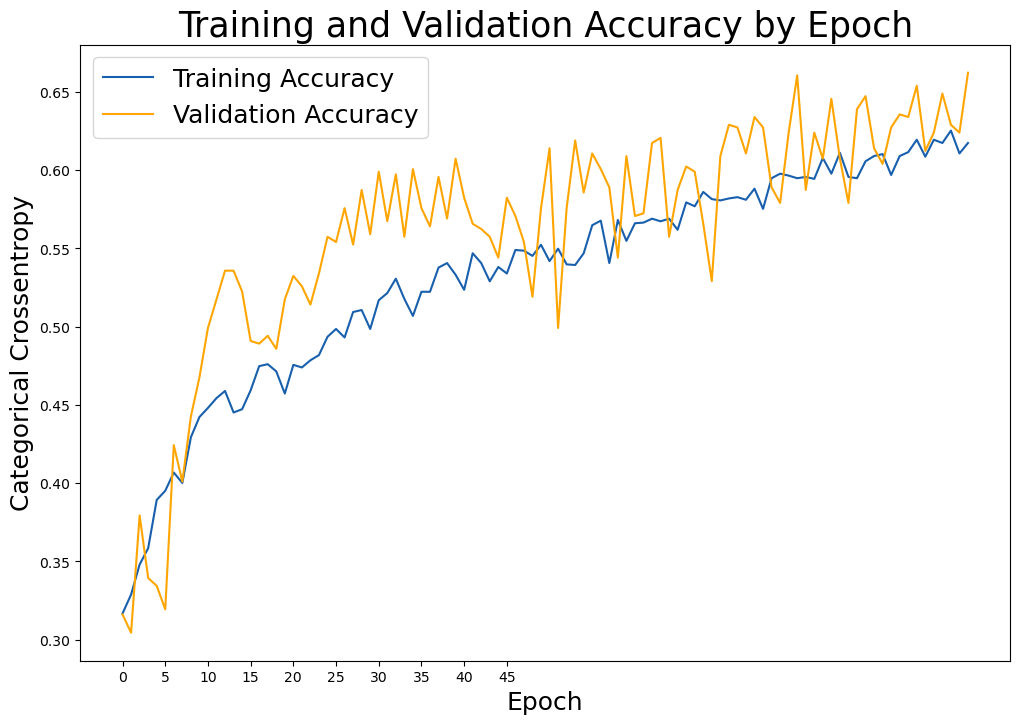

In [21]:
# Check out our train accuracy and validation accuracy over epochs.
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')

# Set title
plt.title('Training and Validation Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(0,50,5), range(0,50,5))

plt.legend(fontsize = 18)
plt.show()

In [22]:
model.save("v1.h5")

In [23]:
model = tf.keras.models.load_model("v1.h5")

In [24]:
model.evaluate(generators.test_generator)

3/3 [==============================] - 2s 573ms/step - loss: 0.7621 - accuracy: 0.6622


[0.7621217966079712, 0.662229597568512]